In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [3]:
from sklearn.preprocessing import normalize

In [4]:
df = pd.read_csv("./datasets/california_houses_price/california_housing_train.csv")
df.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


# No nan filling is needed here

In [6]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [7]:
normalized_df = pd.DataFrame(normalize(df), columns=df.columns)
normalized_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.001702,0.000509,0.000223,0.083566,0.019105,0.015114,0.007028,0.000022,0.996178
1,-0.001422,0.000427,0.000236,0.095035,0.023616,0.014025,0.005752,0.000023,0.995077
2,-0.001337,0.000393,0.000198,0.008401,0.002030,0.003885,0.001365,0.000019,0.999953
3,-0.001561,0.000458,0.000191,0.020444,0.004590,0.007015,0.003078,0.000043,0.999750
4,-0.001749,0.000512,0.000305,0.022192,0.004976,0.009524,0.003999,0.000029,0.999686
5,-0.001548,0.000454,0.000392,0.018739,0.003188,0.009065,0.003229,0.000045,0.999772
6,-0.001389,0.000408,0.000303,0.035246,0.008245,0.022321,0.007675,0.000032,0.999065
7,-0.002362,0.000718,0.000845,0.016739,0.003463,0.007731,0.003257,0.000035,0.999815
8,-0.001952,0.000573,0.000579,0.081583,0.020017,0.053389,0.017989,0.000037,0.994869
9,-0.002381,0.000724,0.000956,0.031102,0.006420,0.016351,0.005630,0.000046,0.999342


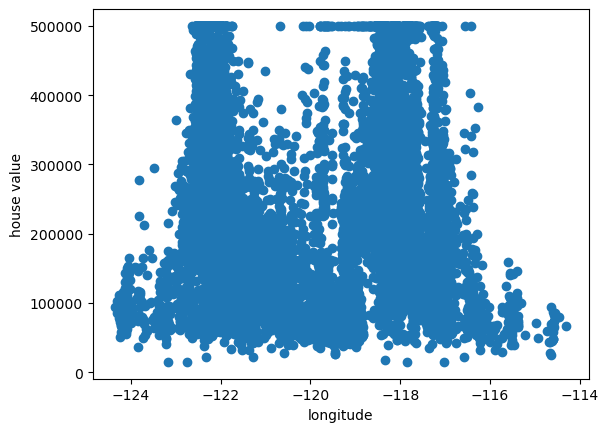

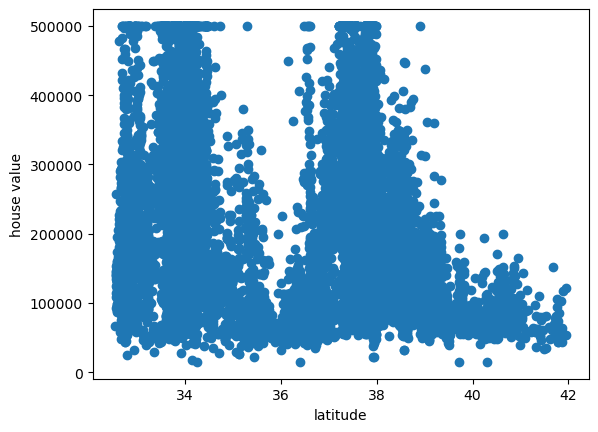

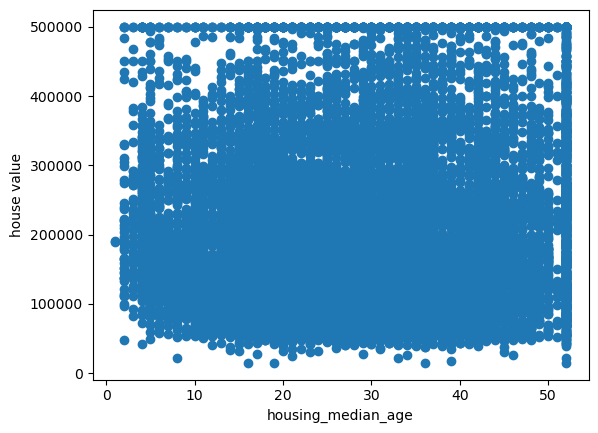

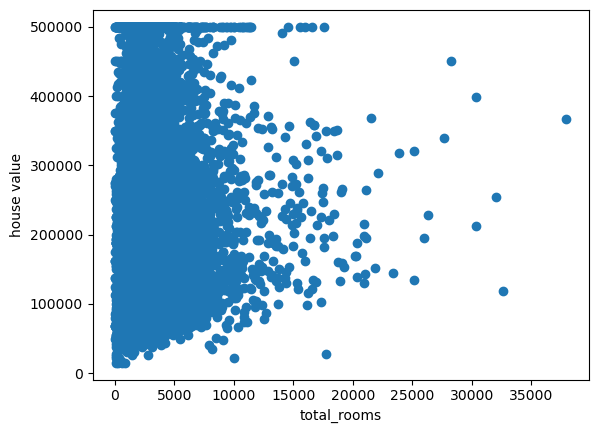

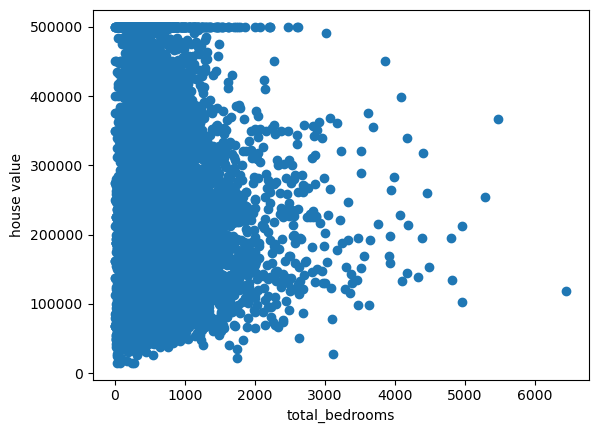

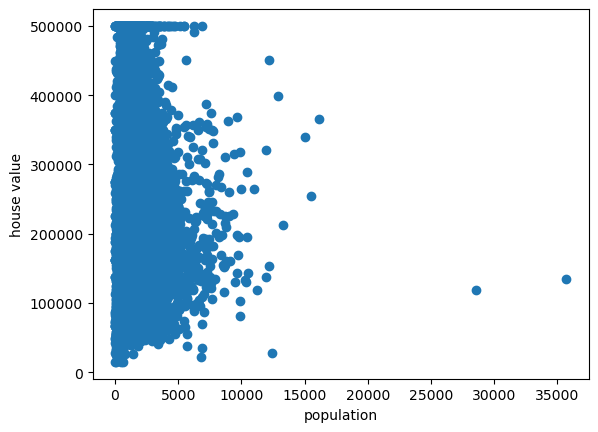

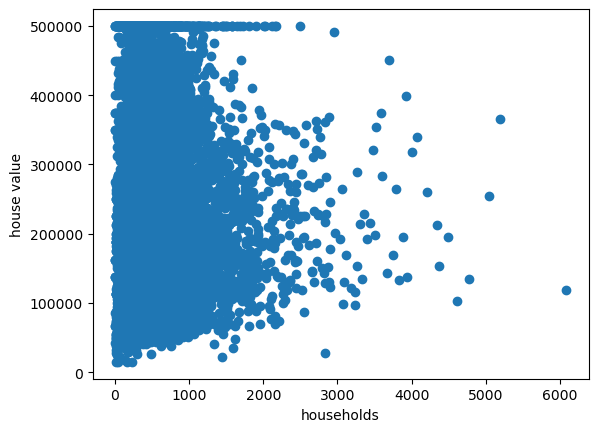

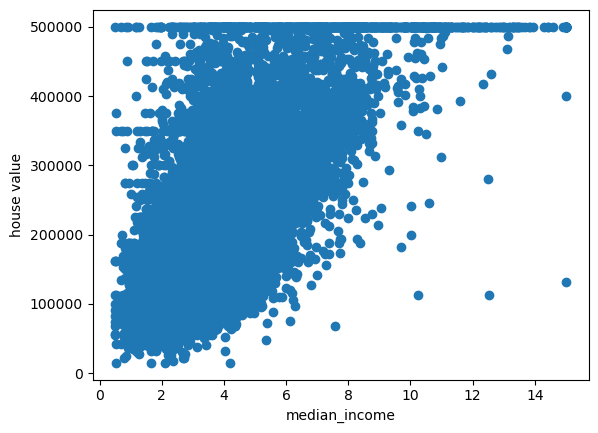

In [9]:
for col in df.columns:
    if col != "median_house_value":
        plt.scatter(df[col], df.median_house_value);
        plt.xlabel(col)
        plt.ylabel("house value")
        plt.savefig(f'./plots/california_project/{col}.png')
        plt.show()


In [12]:
corr_coeffs = normalized_df.corr()["median_house_value"]
corr_coeffs

longitude             0.177369
latitude             -0.172620
housing_median_age   -0.069472
total_rooms          -0.644195
total_bedrooms       -0.592063
population           -0.669824
households           -0.586411
median_income        -0.163714
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [13]:
normalized_df = normalized_df.drop(['housing_median_age'], axis=1)
normalized_df.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-0.001702,0.000509,0.083566,0.019105,0.015114,0.007028,0.000022,0.996178
1,-0.001422,0.000427,0.095035,0.023616,0.014025,0.005752,0.000023,0.995077
2,-0.001337,0.000393,0.008401,0.002030,0.003885,0.001365,0.000019,0.999953
3,-0.001561,0.000458,0.020444,0.004590,0.007015,0.003078,0.000043,0.999750
4,-0.001749,0.000512,0.022192,0.004976,0.009524,0.003999,0.000029,0.999686


In [14]:
second_training_option = normalized_df.drop(['latitude','longitude','median_income'], axis=1)